In [1]:
!pip install scikit-surprise
import numpy as np
import surprise  # run 'pip install scikit-surprise' to install surprise
import os
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate

    100% |████████████████████████████████| 2.4MB 469kB/s 
    100% |████████████████████████████████| 184kB 3.9MB/s 
  Running setup.py bdist_wheel for scikit-surprise ... - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/99/99/d8/a5468fbc316324616dee7cb2ab0c4fe9671441b96130b67e87
Successfully built scikit-surprise


In [0]:
class MatrixFacto(surprise.AlgoBase):
    '''A basic rating prediction algorithm based on matrix factorization.'''
    
    def __init__(self, learning_rate, n_epochs, n_factors):
        
        self.lr = learning_rate  # learning rate for SGD
        self.n_epochs = n_epochs  # number of iterations of SGD
        self.n_factors = n_factors  # number of factors
        self.skip_train = 0
        
    def train(self, trainset):
        '''Learn the vectors p_u and q_i with SGD'''
        
        print('Fitting data with SGD...')
        
        # Randomly initialize the user and item factors.
        p = np.random.normal(0, .1, (trainset.n_users, self.n_factors))
        q = np.random.normal(0, .1, (trainset.n_items, self.n_factors))
        
        # SGD procedure
        for _ in range(self.n_epochs):
            for u, i, r_ui in trainset.all_ratings():
                err = r_ui - np.dot(p[u], q[i])
                # Update vectors p_u and q_i
                p[u] += self.lr * err * q[i]
                q[i] += self.lr * err * p[u]
                # Note: in the update of q_i, we should actually use the previous (non-updated) value of p_u.
                # In practice it makes almost no difference.
        
        self.p, self.q = p, q
        self.trainset = trainset

    def estimate(self, u, i):
        '''Return the estmimated rating of user u for item i.'''
        
        # return scalar product between p_u and q_i if user and item are known,
        # else return the average of all ratings
        if self.trainset.knows_user(u) and self.trainset.knows_item(i):
            return np.dot(self.p[u], self.q[i])
        else:
            return self.trainset.global_mean

In [3]:
# data loading. We'll use the movielens dataset (https://grouplens.org/datasets/movielens/100k/)
# it will be downloaded automatically.
data2 = surprise.Dataset.load_builtin('ml-1m')
data2.split(2)  # split data for 2-folds cross validation

Dataset ml-1m could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-1m.zip...
Done! Dataset ml-1m has been saved to /content/.surprise_data/ml-1m


In [0]:
total_size = 1000000
algo = MatrixFacto(learning_rate=.01, n_epochs=10,n_factors=10)

In [67]:
data = surprise.Dataset.load_builtin('ml-1m')
evalMat = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
MAE (testset)     0.7244  0.7238  0.7241  0.0003  
RMSE (testset)    0.9232  0.9229  0.9230  0.0002  
Fit time          67.13   60.41   63.77   3.36    
Test time         8.16    4.66    6.41    1.75    


In [0]:
temp = []
for k in evalMat.keys():
    temp.append(evalMat[k])
temp = np.array(temp)

rmse_2 = np.mean(temp[0])
fitTime_2 = np.mean(temp[2])

In [69]:
print(rmse_2,fitTime_2,mem_2)

(0.9230060493899674, 63.77203595638275, 250000.0)


In [70]:
data = surprise.Dataset.load_builtin('ml-1m')
evalMat = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6983  0.7019  0.6975  0.6999  0.6996  0.6994  0.0015  
RMSE (testset)    0.8918  0.8966  0.8920  0.8936  0.8948  0.8938  0.0018  
Fit time          119.89  128.75  125.12  117.88  67.79   111.89  22.38   
Test time         3.97    6.19    3.80    3.80    2.02    3.95    1.33    


In [0]:
temp = []
for k in evalMat.keys():
    temp.append(evalMat[k])
temp = np.array(temp)

rmse_5 = np.mean(temp[0])
fitTime_5 = np.mean(temp[2])

In [72]:
print(rmse_5,fitTime_5,mem_5)

(0.8937688994452492, 111.88573122024536, 640000.0)


In [73]:
data = surprise.Dataset.load_builtin('ml-1m')
evalMat = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=8, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 8 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Mean    Std     
MAE (testset)     0.6922  0.6932  0.6919  0.6952  0.6965  0.6948  0.6986  0.6963  0.6948  0.0022  
RMSE (testset)    0.8863  0.8869  0.8847  0.8884  0.8894  0.8887  0.8933  0.8909  0.8886  0.0025  
Fit time          126.65  140.62  136.22  144.93  141.41  148.31  124.31  91.62   131.76  17.07   
Test time         2.83    3.88    2.31    2.34    2.66    2.68    2.70    1.39    2.60    0.65    


In [0]:
temp = []
for k in evalMat.keys():
    temp.append(evalMat[k])
temp = np.array(temp)

rmse_8 = np.mean(temp[0])
fitTime_8 = np.mean(temp[2])
mem_8 = (0.875*0.875)*(total_size)

In [77]:
print(rmse_8,fitTime_8,mem_8)

(0.8885822018517204, 131.7597013115883, 765625.0)


In [16]:
data = surprise.Dataset.load_builtin('ml-1m')
evalMat = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Fitting data with SGD...
Evaluating RMSE, MAE of algorithm MatrixFacto on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
MAE (testset)     0.6952  0.6946  0.6933  0.6910  0.6960  0.6945  0.6981  0.7003  0.6951  0.6897  0.6948  0.0029  
RMSE (testset)    0.8877  0.8871  0.8870  0.8829  0.8897  0.8864  0.8914  0.8945  0.8891  0.8831  0.8879  0.0033  
Fit time          133.45  139.46  143.34  146.70  146.66  152.72  147.95  150.19  132.59  101.40  139.45  14.19   
Test time         2.19    2.48    2.37    2.93    2.12    2.14    2.10    2.09    2.09    1.23    2.17    0.40    


In [0]:
temp = []
for k in evalMat.keys():
    temp.append(evalMat[k])
temp = np.array(temp)

rmse_10 = np.mean(temp[0])
fitTime_10 = np.mean(temp[2])
mem_10 = 0.81*(total_size)

In [56]:
print(rmse_10,fitTime_10,mem_10)

(0.8878954698631695, 139.44640486240388, 810000.0)


## **Root Mean Square Error Analysis:**

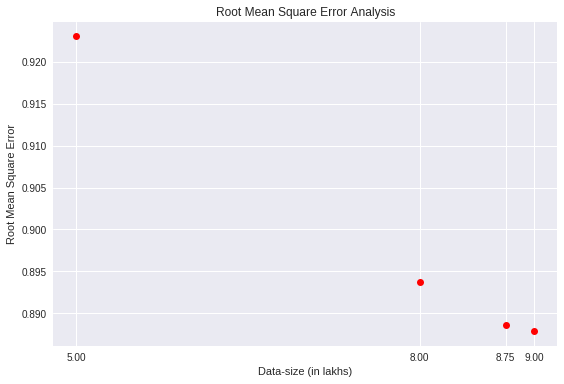

In [78]:
import matplotlib.pyplot as plt
#plt.hist(lst[0,:])
n_groups=4

rmse=np.array((rmse_2,rmse_5,rmse_8,rmse_10))
rmse=tuple(rmse.reshape(1, -1)[0])


plt.plot([5,8,8.75,9],rmse,'ro')
plt.xlabel('Data-size (in lakhs)')
plt.ylabel('Root Mean Square Error')
plt.title('Root Mean Square Error Analysis')

plt.xticks([5,8,8.75,9])

plt.tight_layout()
plt.show()

## **Runtime Analysis:**

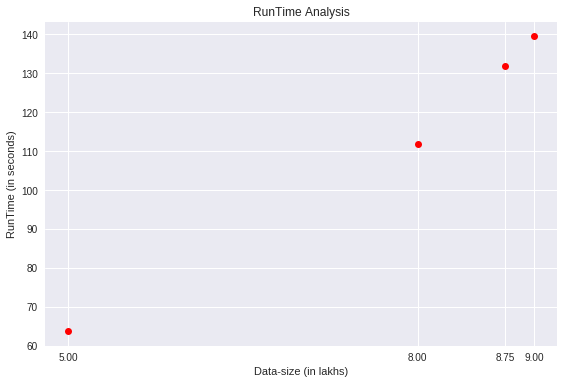

In [79]:
import matplotlib.pyplot as plt
#plt.hist(lst[0,:])
n_groups=4

fit=np.array((fitTime_2,fitTime_5,fitTime_8,fitTime_10))
fit=tuple(fit.reshape(1, -1)[0])

plt.plot([5,8,8.75,9],fit,'ro')
plt.xlabel('Data-size (in lakhs)')
plt.ylabel('RunTime (in seconds)')
plt.title('RunTime Analysis')

plt.xticks([5,8,8.75,9])

plt.tight_layout()
plt.show()

## Memory Analysis:

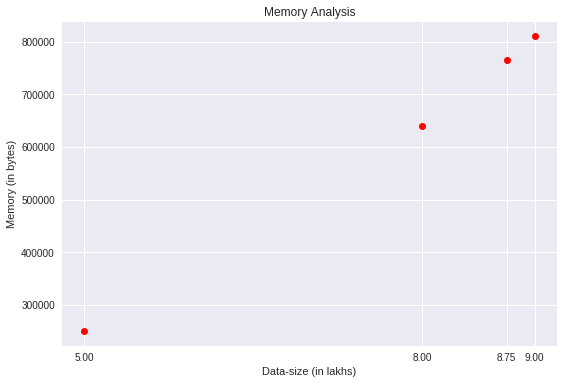

In [58]:
import matplotlib.pyplot as plt
#plt.hist(lst[0,:])
n_groups=4

mem=np.array((mem_2,mem_5,mem_8,mem_10))
mem=tuple(mem.reshape(1, -1)[0])

plt.plot([5,8,8.75,9],mem,'ro')
plt.xlabel('Data-size (in lakhs)')
plt.ylabel('Memory (in bytes)')
plt.title('Memory Analysis')

plt.xticks([5,8,8.75,9])

plt.tight_layout()
plt.show()